{'image': <PIL.Image.Image image mode=RGB size=600x449 at 0x7F21440F3B50>, 'text_input': '亚美尼亚阿巴丹教堂。'}


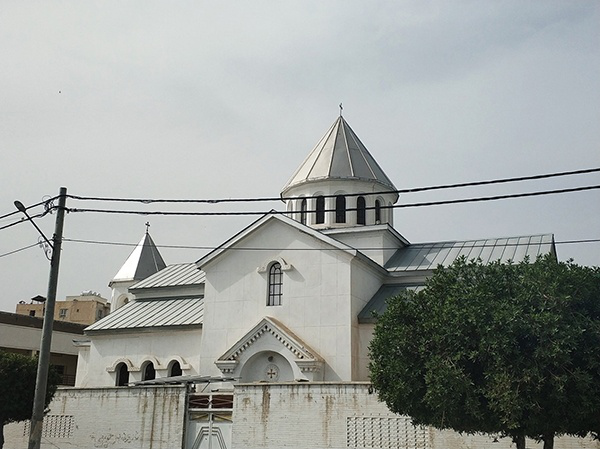

In [10]:
import re
from torchvision import transforms
import transformers
import torch

def pre_caption(caption, max_words: int):
    caption = re.sub(
        r"([.!\"()*#:;~])",
        " ",
        caption.lower(),
    )
    caption = re.sub(
        r"\s{2,}",
        " ",
        caption,
    )
    caption = caption.rstrip("\n")
    caption = caption.strip(" ")

    # truncate caption
    caption_words = caption.split(" ")
    if len(caption_words) > max_words:
        caption = "".join(caption_words[:max_words])

    return caption

def load_laion_dataset(files: str, image_size: int = 224, max_words: int = 64):
    import webdataset as wds

    def to_dict(sample):
        return {
            "image": sample[0],
            "text_input": pre_caption(sample[1]["caption"], max_words),
        }

    # transform_eval = transforms.Compose(
    #     [
    #         transforms.Resize(
    #             (image_size, image_size), interpolation=InterpolationMode.BICUBIC
    #         ),
    #         transforms.ToTensor(),
    #         transforms.Normalize(OPENAI_CLIP_MEAN, OPENAI_CLIP_STD),
    #     ]
    # )

    datapipe = wds.DataPipeline(
        wds.SimpleShardList(files),
        wds.tarfile_to_samples(handler=wds.warn_and_continue),
        # wds.shuffle(1000, handler=wds.warn_and_continue),
        wds.decode("pilrgb", handler=wds.warn_and_continue),
        wds.to_tuple("jpg", "json", handler=wds.warn_and_continue),
        # wds.map_tuple(transforms.ToTensor(), handler=wds.warn_and_continue),
        wds.map(to_dict, handler=wds.warn_and_continue),
    )
    return datapipe

file = "data/laion/laion2b_chinese_release/sim0.34/00000.tar"
dataset = load_laion_dataset(file, image_size=224)
for sample in dataset:
    print(sample)
    display(sample["image"])
    break

In [11]:
from pathlib import Path
import json
from PIL import Image

def load_coco_dataset(file: str, imgpath: str):
    with Path(file).open('r', encoding="utf8") as rf:
        data = json.load(rf)

    for sample in data:
        image_path = Path(imgpath) / sample["image"]
        image = Image.open(image_path).convert("RGB")
        caption = sample["caption"]
        yield {"image": image, "caption": caption}

{'image': <PIL.Image.Image image mode=RGB size=640x426 at 0x7F2076F35750>, 'caption': '机场跑道的喷气式飞机正准备起飞。'}


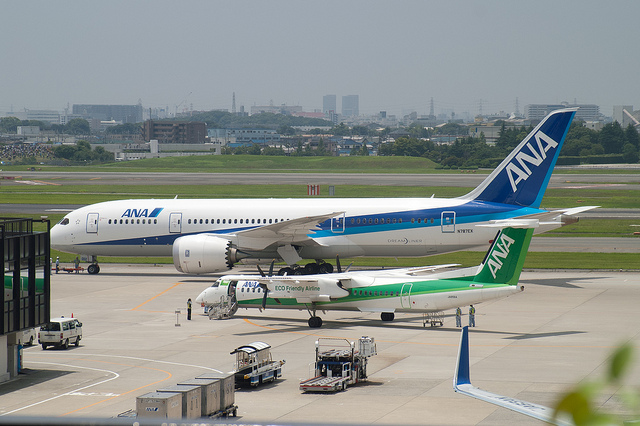

In [12]:
for sample in load_coco_dataset("data/coco/coco-cn-version1805v1.1/imageid.human-written-caption.json", "data/coco/coco-imgs"):
    print(sample)
    display(sample["image"])
    break

{'image': <PIL.Image.Image image mode=RGB size=500x375 at 0x7F207D367250>, 'caption': '一个穿着泳装的女人躺在海水里。'}


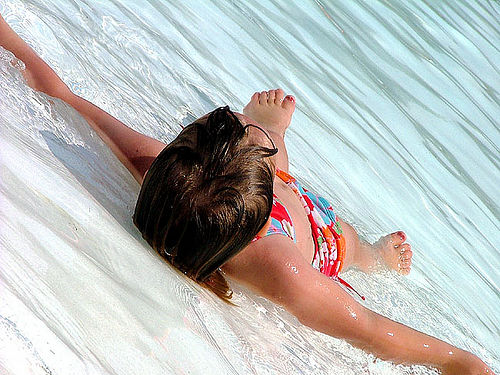

In [13]:
for sample in load_coco_dataset("data/flickr8k/flickr8kzhc.caption.json", "data/flickr8k/Images"):
    print(sample)
    display(sample["image"])
    break

{'image': <PIL.Image.Image image mode=RGB size=375x500 at 0x7F21401A0670>, 'caption': '穿着粉红色连衣裙的孩子爬上楼梯，进入一个入口。'}


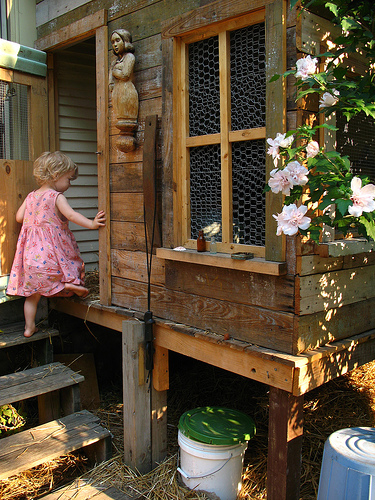

In [14]:
for sample in load_coco_dataset("data/flickr8k/flickr8kzhb.caption.json", "data/flickr8k/Images"):
    print(sample)
    display(sample["image"])
    break

{'image': <PIL.Image.Image image mode=RGB size=375x500 at 0x7F207D3679A0>, 'caption': '一个孩子在一个粉红色的衣服节节攀升了楼梯的条目的方式。'}


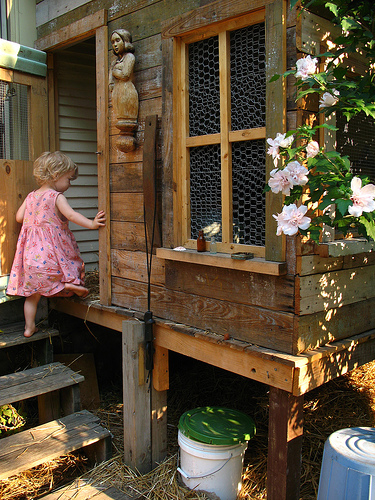

In [15]:
for sample in load_coco_dataset("data/flickr8k/flickr8kzhg.caption.json", "data/flickr8k/Images"):
    print(sample)
    display(sample["image"])
    break